In [18]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-03 04:27:13,606: Credentials are already in use. The existing account in the session will be replaced.


In [29]:
circuit = QuantumCircuit.from_qasm_file('4gt11_82.qasm')

In [30]:
circuit = circuit.decompose()

In [31]:
# from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
# from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
dag = circuit_to_dag(circuit)

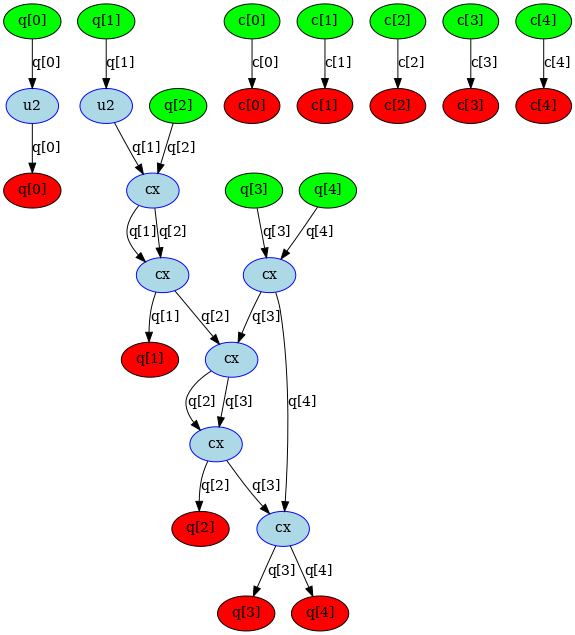

In [32]:
dag_drawer(dag)

In [33]:
for node in dag.topological_op_nodes():
    print(f"gate name is {node.name} with qubits {node.qargs}")

gate name is u2 with qubits [Qubit(QuantumRegister(5, 'q'), 0)]
gate name is u2 with qubits [Qubit(QuantumRegister(5, 'q'), 1)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 1)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 2)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 4), Qubit(QuantumRegister(5, 'q'), 3)]


In [38]:
front = []
for node in dag.front_layer():
    front.append(node)
    print(f"gate name is {node.name} with qubits {node.qargs}")

gate name is u2 with qubits [Qubit(QuantumRegister(5, 'q'), 0)]
gate name is u2 with qubits [Qubit(QuantumRegister(5, 'q'), 1)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)]


In [44]:
print(front)
dag.remove_op_node(front[1])


[<qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d0880d60>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d0880be0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d10304c0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d0880be0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d10304c0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d0880be0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f09d10304c0>]


In [45]:
for node in dag.front_layer():
    front.append(node)
    print(f"gate name is {node.name} with qubits {node.qargs}")

gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 1)]
gate name is cx with qubits [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)]
